Yelp Reviews

# Bag of Words Text Analysis

Inspect Data

In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("yelp_reviews.csv")

In [15]:
print("type of yelp_reviews: {}".format(type(df)))
print("length of yelp_reviews: {}".format(len(df)))

type of yelp_reviews: <class 'pandas.core.frame.DataFrame'>
length of yelp_reviews: 1000


In [4]:
df.head()

,class,text
0,positive,Wow... Loved this place.
1,negative,Crust is not good.
2,negative,Not tasty and the texture was just nasty.
3,positive,Stopped by during the late May bank holiday of...
4,positive,The selection on the menu was great and so wer...


In [16]:
# Balanced dataset in terms of postive and negative reviews
df["class"].value_counts()

positive    500
negative    500
Name: class, dtype: int64

In [17]:
# Create variables as numpy arrays / covert positive and negative to 1s and 0s
X = df.text.values
y = df['class'].replace({'negative': 0, 'positive': 1}).values

In [18]:
# Inspect
print(X[:5])
print(y[:5])

['Wow... Loved this place.' 'Crust is not good.'
 'Not tasty and the texture was just nasty.'
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'
 'The selection on the menu was great and so were the prices.']
[1 0 0 1 1]


In [19]:
# Split raw data into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train)

800

# CountVectorize: convert to "Bag of Words"

In [10]:
# Import and instantiate the Countvectorizer and fit to Yelp data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# Learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(X_train)

NameError: name 'X_train' is not defined

In [10]:
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))
print()
print("Vocabulary details: {}".format(vectorizer.vocabulary_))

Vocabulary size: 1792

Vocabulary details: {'the': 1567, 'worst': 1769, 'was': 1707, 'salmon': 1334, 'sashimi': 1343, 'an': 51, 'excellent': 534, 'new': 1047, 'restaurant': 1292, 'by': 226, 'experienced': 542, 'frenchman': 623, 'went': 1729, 'for': 611, 'lunch': 937, 'service': 1385, 'slow': 1427, 'think': 1580, 'this': 1584, 'suffers': 1521, 'from': 631, 'not': 1059, 'trying': 1631, 'hard': 722, 'enough': 512, 'just': 853, 'had': 706, 'here': 748, 'and': 52, 'great': 680, 'experience': 541, 'got': 671, 'home': 764, 'to': 1597, 'see': 1368, 'driest': 467, 'damn': 377, 'wings': 1751, 'ever': 526, 'delicious': 398, 'they': 1575, 'brought': 206, 'fresh': 624, 'batch': 126, 'of': 1069, 'fries': 630, 'thinking': 1581, 'yay': 1779, 'something': 1445, 'warm': 1704, 'but': 224, 'no': 1053, 'then': 1572, 'tragedy': 1618, 'struck': 1506, 'awful': 106, 'food': 608, 'huge': 786, 'portions': 1196, 'give': 655, 'military': 993, 'discount': 432, 'waiter': 1694, 'wasn': 1708, 'helpful': 746, 'or': 109

In [11]:
# To create the "bag-of_words" representation we call the transform method or transform documents to document-term matrix.
X_train_vect = vectorizer.transform(X_train)
print("X_train_vect: {}".format(repr(X_train_vect)))

X_train_vect: <800x1792 sparse matrix of type '<class 'numpy.int64'>'
	with 7843 stored elements in Compressed Sparse Row format>


In [12]:
print("Dense representation of bag_of_words:: \n{}".format(X_train_vect.toarray()))

Dense representation of bag_of_words:: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Examine Bag of Words

In [13]:
feature_names = vectorizer.get_feature_names()

print("Number of features: {}".format(len(feature_names)))
print()
print("First 40 features: \n{}".format(feature_names[:40]))
print()
print("A lot numbers have been converted to tokens - do they have any meaning?")
print("Spelling mistakes")

Number of features: 1792

First 40 features: 
['10', '100', '12', '17', '1979', '20', '2007', '30', '30s', '35', '40', '40min', '45', '4ths', '5lb', '70', '85', '90', 'about', 'above', 'absolute', 'absolutely', 'absolutley', 'accident', 'accomodate', 'accountant', 'acknowledged', 'actual', 'actually', 'added', 'affordable', 'after', 'afternoon', 'again', 'ago', 'ahead', 'airline', 'ala', 'all', 'allergy']

A lot numbers have been converted to tokens - do they have any meaning?
Spelling mistakes


In [14]:
print("Features 500 to 550: \n{}".format(feature_names[500:550]))
print()
print("Singular and plurals - e.g. employee and employees")
print("Similar words with little difference in meaning - 'experience', 'experienced', 'experiencing' ")

Features 500 to 550: 
['else', 'elsewhere', 'email', 'employee', 'employees', 'empty', 'end', 'ended', 'english', 'enjoy', 'enjoyable', 'enjoyed', 'enough', 'ensued', 'entire', 'entrees', 'equally', 'especially', 'establishment', 'etc', 'ethic', 'eve', 'even', 'evening', 'event', 'events', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'exactly', 'excalibur', 'exceeding', 'excellent', 'exceptional', 'excuse', 'expanded', 'expect', 'expectations', 'expected', 'experience', 'experienced', 'experiencing', 'expert', 'exquisite', 'extensive', 'extra', 'extremely', 'eyed']

Singular and plurals - e.g. employee and employees
Similar words with little difference in meaning - 'experience', 'experienced', 'experiencing' 


In [15]:
print("Every 25th feature: \n{}".format(feature_names[::25]))
print()
print("'hasn', ")

Every 25th feature: 
['10', 'accountant', 'ample', 'are', 'average', 'basically', 'bellies', 'bloody', 'breaks', 'butter', 'case', 'chewy', 'cocktails', 'considering', 'covers', 'cut', 'delightful', 'disappoint', 'donut', 'duck', 'else', 'events', 'eyes', 'fella', 'flavors', 'fridays', 'generous', 'grain', 'guests', 'hasn', 'hi', 'horrible', 'imagination', 'instead', 'judging', 'later', 'liking', 'love', 'mall', 'mediocre', 'missed', 'multiple', 'nicest', 'oil', 'otto', 'pan', 'pecan', 'pizza', 'potato', 'pros', 'raspberry', 'refrained', 'revisiting', 'rushed', 'saving', 'send', 'shoe', 'slaw', 'sooooo', 'standard', 'strawberry', 'summary', 'tasty', 'they', 'today', 'trimmed', 'unless', 'ventilation', 'walls', 'weekly', 'wines', 'wrap']

'hasn', 


Perform baseline before we try to improve

In [16]:
# Build a classifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()
model

LogisticRegression()

In [18]:
scores = cross_val_score(model, X_train_vect, y_train, cv=5)

In [19]:
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.811


Reasonable performance for a balanced binary classification task. Try tuning regularization paramenter C to improve result.

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[0.001, 0.01, 0.1, 1, 10, 30]}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train_vect, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.816
Best parameters:  {'C': 30}


Assess the generalization performance on the test set using a C=10

In [21]:
X_test_vect = vectorizer.transform(X_test)
print("{:.3f}".format(grid.score(X_test_vect, y_test)))

0.800


Improve extraction of words

CountVectorizer extracts tokens using a regular expression "\b\w\w+\b" which finds all sequences of characters that consist of at least 2 letters or numbers (\w) and are separated by word boundaries. It splits contractions like doesn't into doesn and t. It converts all words to lowercase.

In [22]:
# Remove some of the useless tokens by setting a minimum number of documents a token needs to appear in with min_df
vectorizer = CountVectorizer(min_df=2).fit(X_train)
X_train_vect = vectorizer.transform(X_train)
print("X_train_vect with mind_df: {}".format(repr(X_train_vect)))

X_train_vect with mind_df: <800x744 sparse matrix of type '<class 'numpy.int64'>'
	with 6795 stored elements in Compressed Sparse Row format>


In [23]:
feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print()
print("First 20 features: \n{}".format(feature_names[:40]))
print()
print("Features 100 to 150: \n{}".format(feature_names[100:150]))
print()
print("Every 25th feature: \n{}".format(feature_names[::25]))

Number of features: 744

First 20 features: 
['10', '20', '30', '35', '40', 'about', 'absolutely', 'added', 'after', 'again', 'ago', 'all', 'almost', 'also', 'although', 'always', 'am', 'amazing', 'ambiance', 'amount', 'an', 'and', 'another', 'any', 'anyone', 'anything', 'anytime', 'anyway', 'appetizers', 'are', 'area', 'around', 'arrived', 'as', 'ask', 'asked', 'assure', 'at', 'ate', 'atmosphere']

Features 100 to 150: 
['bunch', 'burger', 'burgers', 'business', 'busy', 'but', 'butter', 'by', 'cafe', 'came', 'can', 'cannot', 'cant', 'care', 'cashier', 'char', 'charcoal', 'cheap', 'check', 'checked', 'cheese', 'cheeseburger', 'chef', 'chewy', 'chicken', 'chinese', 'chips', 'choose', 'clean', 'close', 'coffee', 'cold', 'color', 'come', 'comfortable', 'coming', 'company', 'complain', 'completely', 'considering', 'convenient', 'cook', 'cooked', 'cool', 'could', 'couple', 'course', 'cow', 'crazy', 'cream']

Every 25th feature: 
['10', 'anything', 'back', 'better', 'bunch', 'chinese', 'crea

In [24]:
model2 = LogisticRegression()
model2

LogisticRegression()

In [25]:
grid = GridSearchCV(model2, param_grid, cv=5)

In [26]:
grid.fit(X_train_vect, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 30]})

In [27]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.814
Best parameters:  {'C': 10}


In [28]:
X_test_vect = vectorizer.transform(X_test)
print("{:.3f}".format(grid.score(X_test_vect, y_test)))

0.810


Reduced features from 1792 to 744 with no loss in model accuracy

# Stopwords

In [29]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword: \n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword: 
['anything', 'being', 'down', 'de', 'six', 'nowhere', 'system', 'less', 'very', 'thereby', 'whence', 'at', 're', 'others', 'never', 'name', 'whose', 'every', 'well', 'moreover', 'someone', 'describe', 'seem', 'had', 'when', 'be', 'couldnt', 'whereupon', 'your', 'which', 'should', 'into']


In [30]:
vectorizer = CountVectorizer(min_df=2, stop_words = "english").fit(X_train)
X_train_vect = vectorizer.transform(X_train)
print("X_train_vect with stop words:\n{}".format(repr(X_train_vect)))

X_train_vect with stop words:
<800x576 sparse matrix of type '<class 'numpy.int64'>'
	with 2940 stored elements in Compressed Sparse Row format>


In [31]:
model3 = LogisticRegression()
grid = GridSearchCV(model3, param_grid, cv=5)
grid.fit(X_train_vect, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.795
Best parameters:  {'C': 1}


# Rescaling the Data with tf-idf

Term Frequency (TF) - Inverse Document Frequency (IDF) - i.e. give a high weight to any term that appears often in a particular document, but not in very many documents in the corpus. If a word appears many times in a document, but not in very many documents, it is likely to be descriptive of those documents.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=1, norm=None), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01,0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))

Best cross-validation score: 0.823


In [33]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset
X_train_vect = vectorizer.transform(X_train)
# find maximum value for each of the features over the dataset
max_value = X_train_vect.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())
print("Number of features: {}".format(len(feature_names)))
print()
print("Features with lowest tfidf:\n{}".format(feature_names[sorted_by_tfidf[:50]]))
print()
print("Features with highest tfidf:\n{}".format(feature_names[sorted_by_tfidf[-50:]]))

Number of features: 1792

Features with lowest tfidf:
['service' 'my' 'but' 'have' 'at' 'here' 'time' 'go' 'one' 'just' 'out'
 'don' 'delicious' 'would' 'friendly' 'ever' 'your' 'by' 'only' 'also'
 'nice' 'came' 'restaurant' 'again' 'vegas' 'amazing' 'us' 'when' 'won'
 'experience' 'going' 'disappointed' 'first' 'love' 'even' 'eat' 'because'
 'about' 'say' 'salad' 'me' 'too' 'much' 'fresh' 'or' 'which' 'think'
 'definitely' 'always' 'could']

Features with highest tfidf:
['well' 'stars' 'we' 'quality' 'than' 'night' 'to' 'great' 'slow' 'sauce'
 'probably' 'hot' 'selection' 'she' 'burger' 'flavor' 'meal' 'sandwich'
 'another' 'dining' 'dishes' 'once' 'you' 'area' 'long' 'overpriced'
 'talk' 'pasta' 'zero' 'party' 'worse' 'flat' 'salsa' 'greek' 'sucked'
 'crowd' 'yum' 'marrow' 'shower' 'tribute' 'customers' 'bye' 'crab' 'fly'
 'legs' 'subway' 'steak' 'wait' 'waited' 'said']


In [34]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['the' 'and' 'was' 'to' 'is' 'it' 'this' 'of' 'food' 'not' 'in' 'place'
 'for' 'good' 'we' 'service' 'my' 'had' 'great' 'that' 'with' 'so' 'were'
 'be' 'back' 'but' 'very' 'have' 'you' 'at' 'here' 'are' 'on' 'they'
 'like' 'all' 'time' 'our' 'really' 'will' 'go' 'there' 'as' 'an' 'best'
 'one' 'just' 'don' 'out' 'their' 'would' 'delicious' 'up' 'friendly'
 'your' 'ever' 'only' 'by' 'also' 'nice' 'no' 'restaurant' 'can' 'did'
 'came' 'if' 'again' 'vegas' 'what' 'when' 'amazing' 'us' 'from'
 'experience' 'going' 'pretty' 'never' 'won' 'even' 'first' 'been'
 'disappointed' 'eat' 'love' 'got' 'much' 'bad' 'about' 'some' 'because'
 'too' 'me' 'salad' 'get' 'say' 'fresh' 'which' 'staff' 've' 'he']


# Model Coefficients

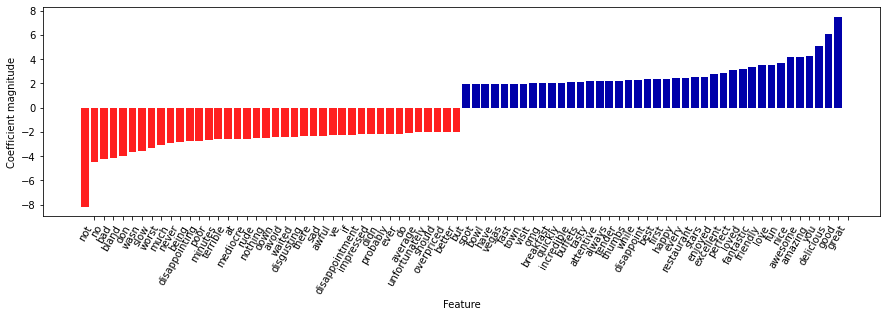

In [45]:
import mglearn
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"]
    .coef_, feature_names, n_top_features=40)

# Bag of Words with more than one word (n-Grams)

In bag-of-words, word order is discarded.

In [48]:
pipe = make_pipeline(TfidfVectorizer(min_df=1), LogisticRegression())
# running the grid search takes a long time because of the large grid and inclusion of tri-grams
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100], "tfidfvectorizer__ngram_range": [(1,1), (1,2), (1,3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: \n{}".format(grid.best_params_))

Best cross-validation score: 0.818
Best parameters: 
{'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 1)}


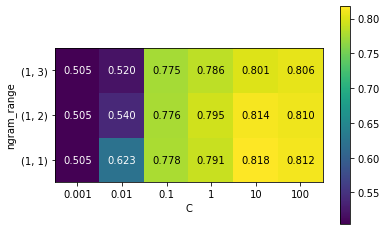

In [49]:
# extract scores from grid_search
import matplotlib.pyplot as plt
scores = grid.cv_results_["mean_test_score"].reshape(-1,3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f", 
    xticklabels=param_grid["logisticregression__C"],
    yticklabels=param_grid["tfidfvectorizer__ngram_range"])
plt.colorbar(heatmap)

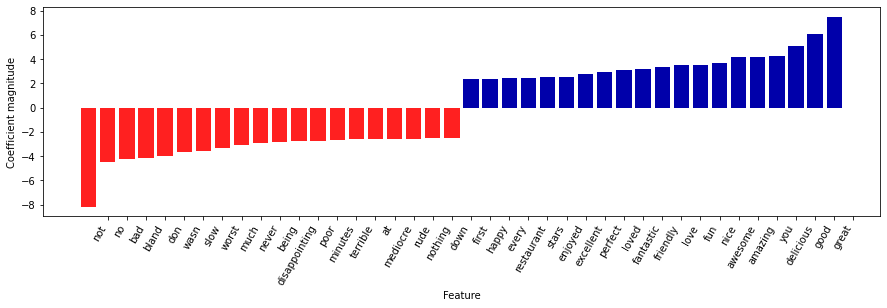

In [38]:
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=20)

# Advanced Tokenization, Stemming and Lemmatization

In [39]:
import spacy
import nltk

In [40]:
# load spacy's English-language models
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")
# instantiate nltk's Porter Stemmer
stemmer = nltk.stem.PorterStemmer()

In [41]:
# define function to compare lemmatization in spacy with stemming in nltk
def compare_normalization(doc):
    # tokenize document in spacy
    doc_spacy = nlp(doc)
    # print lemmas found by spacy
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    # print tokens found by Porter Stemmer
    print("Stemming:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [42]:
compare_normalization(u"Our meeting today was worse than yesterday,""I'm scared of meeting the clients tomorrow.")

Lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', "i'm", 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', "i'm", 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [ ]:
nlp.tokenizer.

In [6]:
import re
regexp = re.compile('(?u)\\b\\w\\w+\\b')

In [38]:
old_tokenizer = nlp.tokenizer
nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(regexp.findall(string))
nlp.tokenizer
nlp()

<function __main__.<lambda>(string)>

In [32]:
import en_core_web_sm
# Load a pipeline using the name of an installed package
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
old_tokenizer = nlp.tokenizer
# replace the tokenizer with the preceding regexp
nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(regexp.findall(string))

# create a custom tokenizer using the spacy document processing pipeline, now using our own tokenizer
# def custom_tokenizer(document):
#     doc_spacy = nlp(document)
#     return [token.lemma_ for token in doc_spacy]
def custom_tokenizer(document):
    from spacy.tokens import Doc
    # Load a pipeline using the name of an installed package
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    
    doc_spacy = nlp(document)
    nlp = Doc(doc_spacy.vocab, words=[t.text for t in doc_spacy])
    token_lemma_data = [token.lemma_ for token in doc_spacy]
    return token_lemma_data

In [33]:
#define a count vectorizer with the custom tokenizer
from sklearn.feature_extraction.text import CountVectorizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=2)

In [34]:
X_train_lemma_vect = lemma_vect.fit_transform(X_train)
print("X_train_lemma.shape: {}".format(X_train_lemma_vect.shape))

X_train_lemma.shape: (800, 702)


In [ ]:
def custom_tokenizer(document):
from spacy.tokens import Doc
import spacy

doc_spacy = spacy.load('en')   # --> set the language to English
doc = doc_spacy(document)      # --> set the document vocab

print("custom_tokenizer::SIZE OF document: ", len(document))
print("custom_tokenizer::type of document: {}".format(type(document)))
print("custom_tokenizer::document:\n{}\n".format(document))

'''
Use Doc constructor with vocabulary and words input parameters
'''
doc_spacy = Doc(doc.vocab, words=[t.text for t in doc])

token_lemma_data = [token.lemma_ for token in doc_spacy]

'''
print("custom_tokenizer::Token Lemma:\n{}\n".format(result))
'''

return token_lemma_data

def custom_tokenizer(document):
    from spacy.tokens import Doc
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    doc_spacy = nlp(document)
    nlp = Doc(doc.vocab, words=[t.text for t in doc])
    token_lemma_data = token.lemma_ for token in doc_spacy
    return token_lemma_data